In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('IBM_HR_parc').getOrCreate()
spark

In [2]:
import os 
cwd = os.getcwd()

# CSV 파일 읽기
df = spark.read.format('csv')\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load(os.path.join(cwd, "learning_spark_data/HR-Employee-Attrition.csv"))

df.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [3]:
# df 컬럼 이름, 타입 확인하기 
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [4]:
# 결측치 확인 
from pyspark.sql.functions import col, sum as _sum

null_counts = df.select([
    _sum(col(c).isNull().cast('int')).alias(c) for c in df.columns
])

null_counts.show()

+---+---------+--------------+---------+----------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+-------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|BusinessTravel|DailyRate|Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPr

In [5]:
# DistanceFromHome, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance, OverTime
# 

In [6]:
# 퇴사 여부별 인원 수 
df.groupBy("Attrition").count().show()


+---------+-----+
|Attrition|count|
+---------+-----+
|       No| 1233|
|      Yes|  237|
+---------+-----+



In [7]:
# 퇴사 여부별 평균 급여
df.groupBy("Attrition").avg("MonthlyIncome").show()

+---------+------------------+
|Attrition|avg(MonthlyIncome)|
+---------+------------------+
|       No| 6832.739659367397|
|      Yes|4787.0928270042195|
+---------+------------------+



In [8]:
# 퇴사여부 + 직무별 평균 환경 만족도 
df.groupBy("Attrition", "JobRole")\
     .avg("EnvironmentSatisfaction")\
     .orderBy("Attrition", "JobRole")\
     .show()

+---------+--------------------+----------------------------+
|Attrition|             JobRole|avg(EnvironmentSatisfaction)|
+---------+--------------------+----------------------------+
|       No|Healthcare Repres...|           2.819672131147541|
|       No|     Human Resources|                       2.675|
|       No|Laboratory Techni...|          2.8223350253807107|
|       No|             Manager|           2.814432989690722|
|       No|Manufacturing Dir...|          2.9407407407407407|
|       No|   Research Director|          2.4871794871794872|
|       No|  Research Scientist|           2.746938775510204|
|       No|     Sales Executive|          2.7323420074349443|
|       No|Sales Representative|                        2.76|
|      Yes|Healthcare Repres...|           2.111111111111111|
|      Yes|     Human Resources|          2.3333333333333335|
|      Yes|Laboratory Techni...|          2.3870967741935485|
|      Yes|             Manager|                         1.8|
|      Y

## 시각화

In [26]:
pdf = df.toPandas()


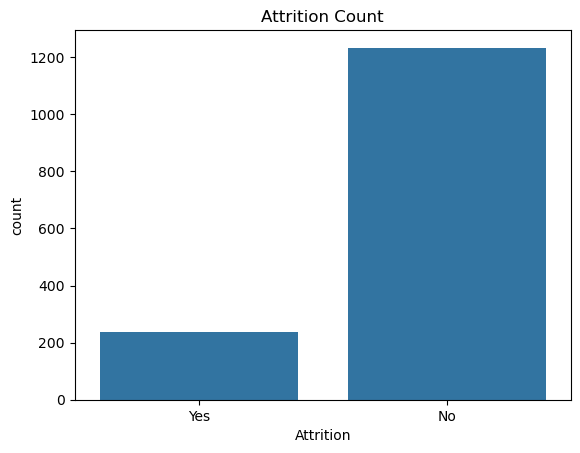

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Attrition", data=pdf)
plt.title("Attrition Count")
plt.show()


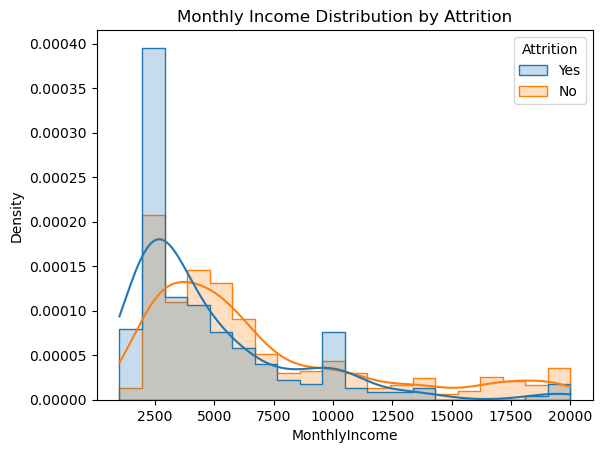

In [38]:
sns.histplot(data=pdf, x="MonthlyIncome", hue="Attrition", kde=True, element="step", stat="density", common_norm=False)
plt.title("Monthly Income Distribution by Attrition")
plt.show()


In [32]:
# 수치형 데이터 비교 

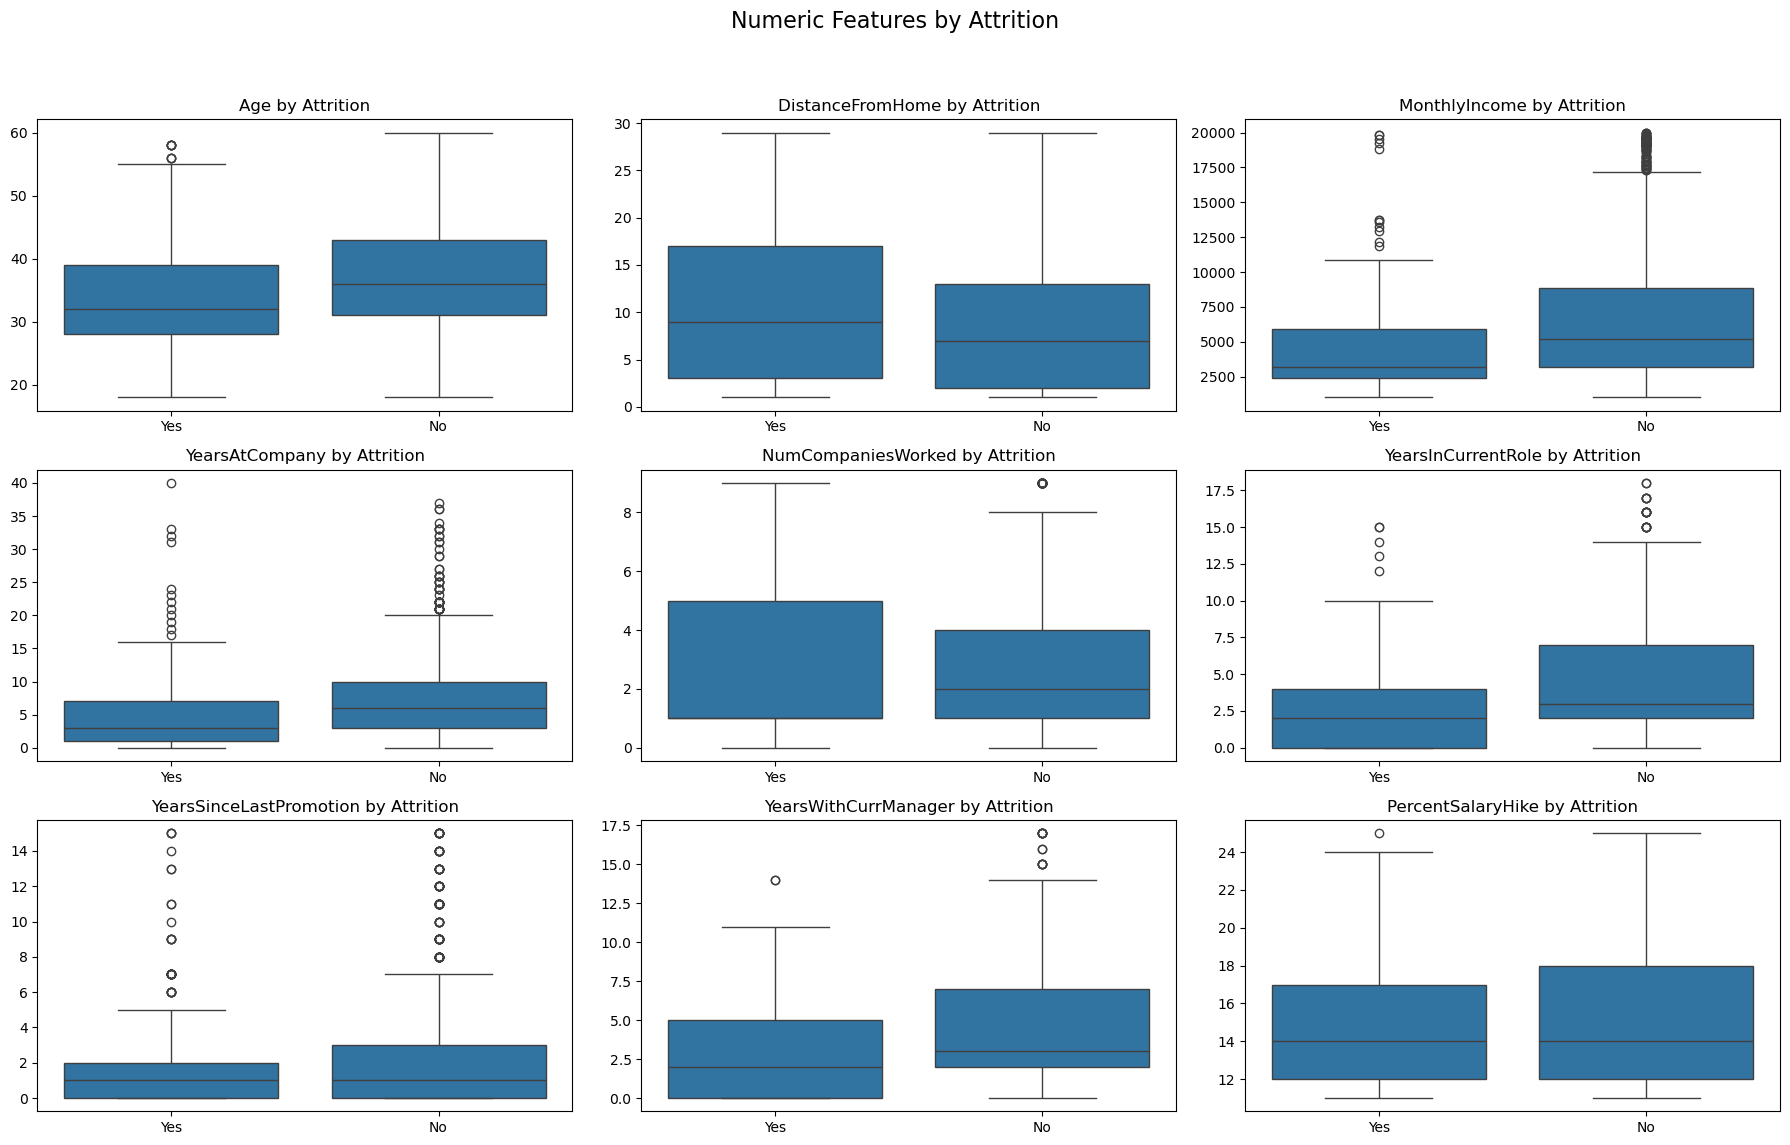

In [39]:
# 수치형 변수 리스트

numeric_cols = [
    "Age", "DistanceFromHome", "MonthlyIncome", "YearsAtCompany",
    "NumCompaniesWorked", "YearsInCurrentRole", "YearsSinceLastPromotion",
    "YearsWithCurrManager", "PercentSalaryHike"
]

# Figure 생성
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle("Numeric Features by Attrition", fontsize=16)

# Flatten subplot axes 배열
axes = axes.flatten()

# 각 subplot에 Boxplot 그리기
for idx, col in enumerate(numeric_cols):
    sns.boxplot(x="Attrition", y=col, data=pdf, ax=axes[idx])
    axes[idx].set_title(f"{col} by Attrition", fontsize=12)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")

# 남은 빈 subplot 비우기 (변수 개수 < subplot 수일 경우)
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 공간 확보
plt.show()

In [33]:
# 범주형 변수 

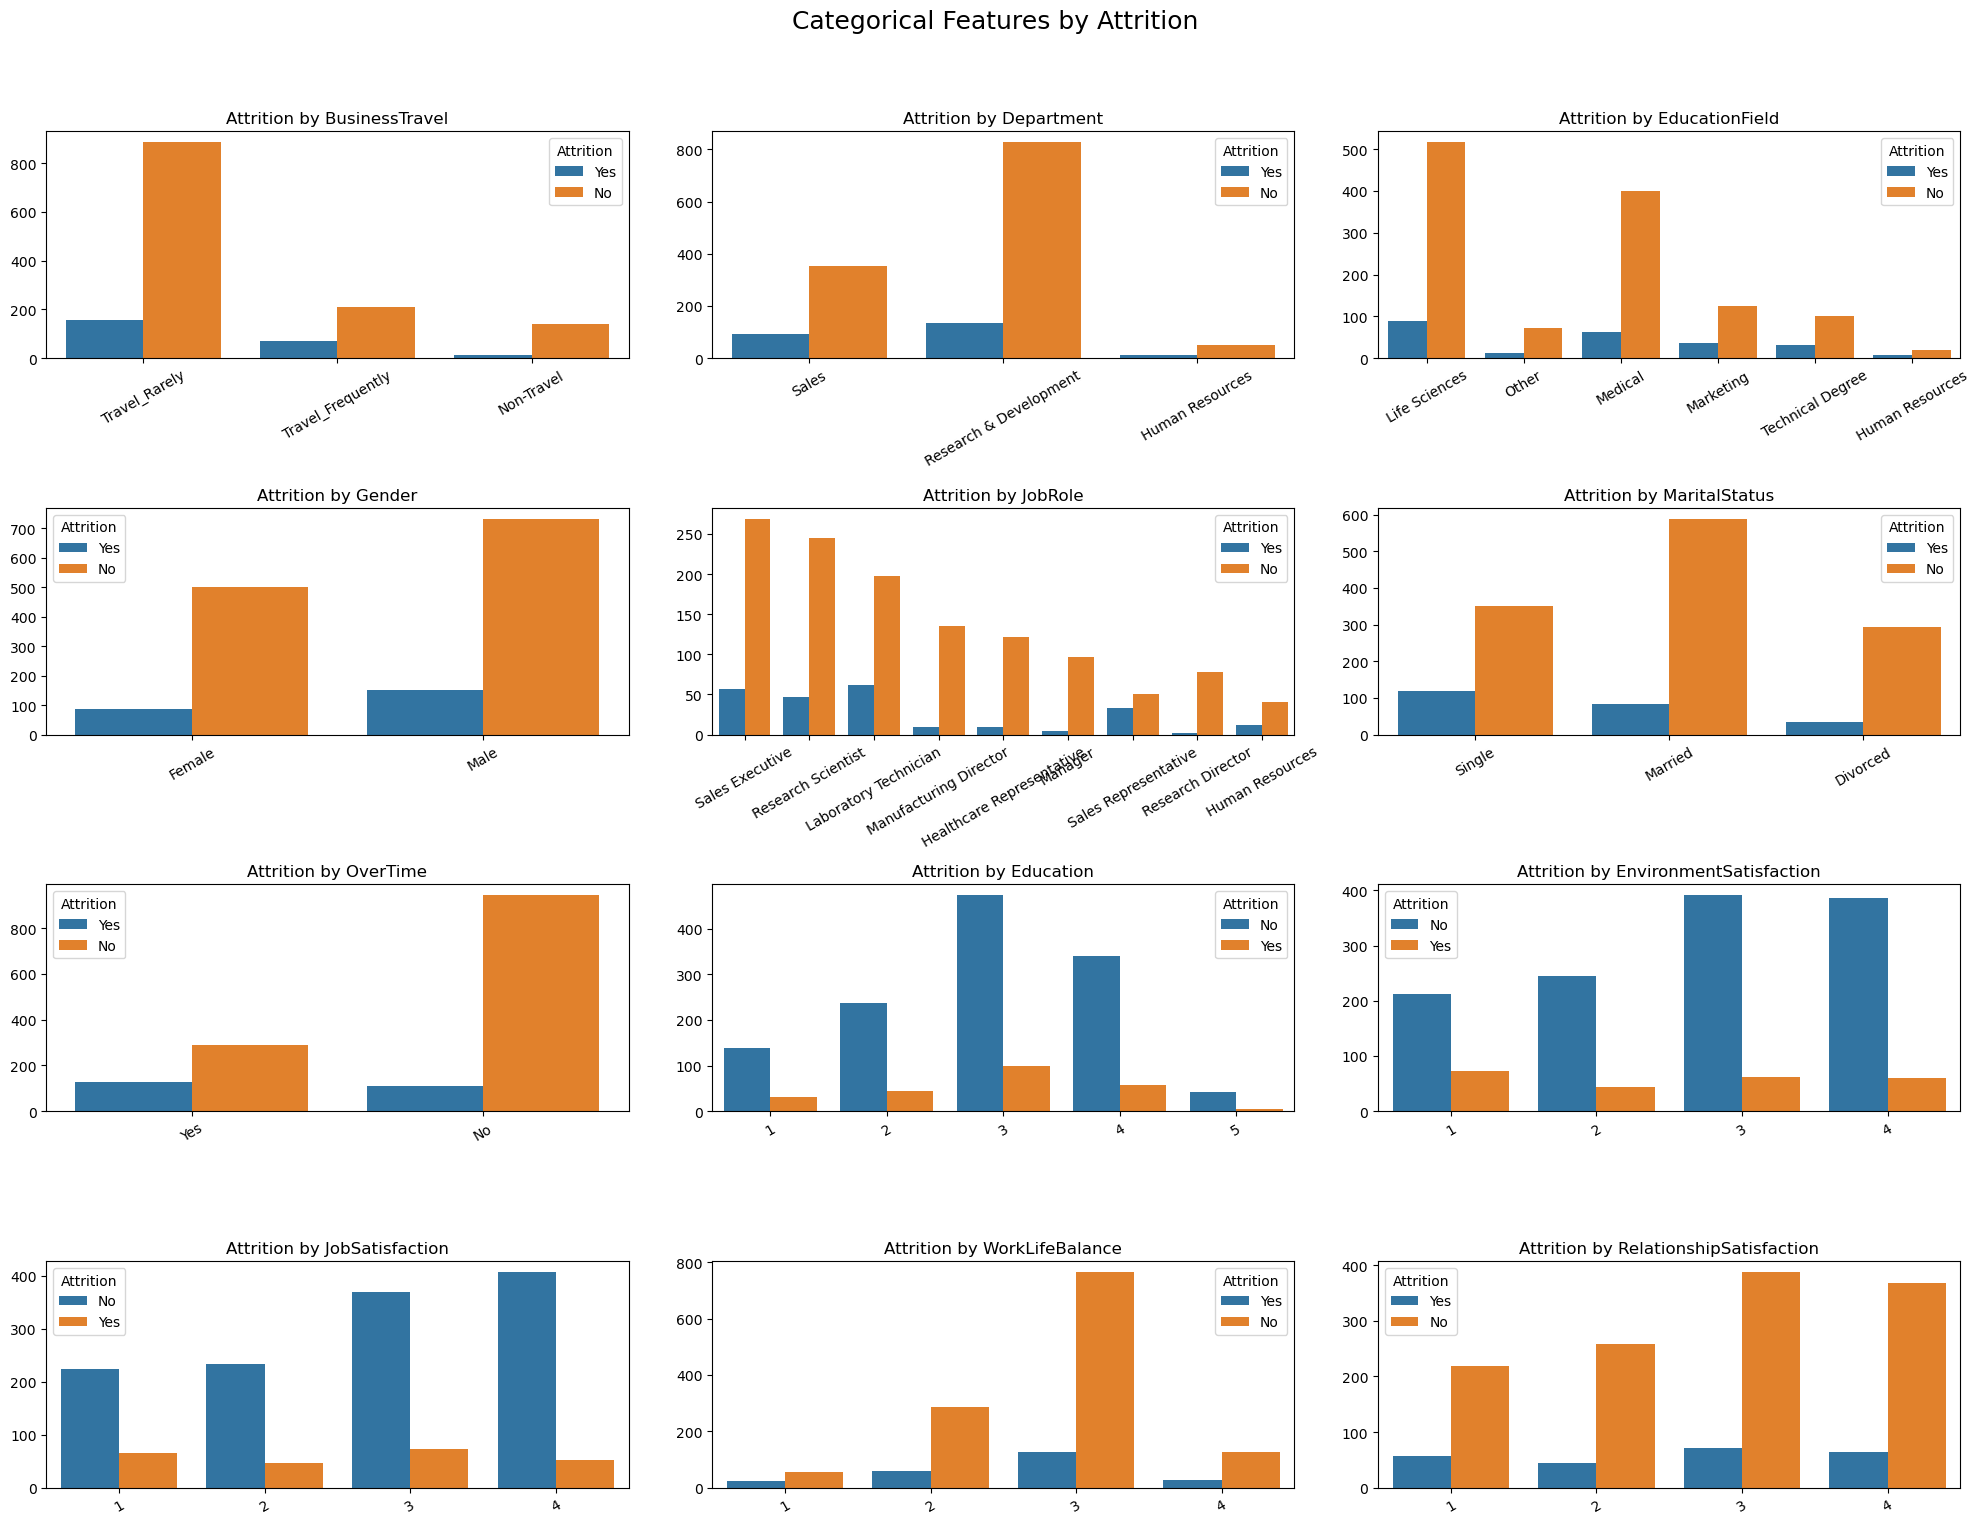

In [42]:
# 범주형 변수 리스트
categorical_cols = [
    "BusinessTravel", "Department", "EducationField", "Gender",
    "JobRole", "MaritalStatus", "OverTime", "Education",
    "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance",
    "RelationshipSatisfaction"
]

# Figure 생성
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 16))
fig.suptitle("Categorical Features by Attrition", fontsize=18)

# Flatten axes 배열
axes = axes.flatten()

# 각 subplot에 countplot 그리기
for idx, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="Attrition", data=pdf, ax=axes[idx])
    axes[idx].set_title(f"Attrition by {col}", fontsize=12)
    axes[idx].tick_params(axis='x', rotation=30)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")

# 남은 subplot 비우기 (변수 수 < subplot 수일 경우)
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 공간 확보
plt.show()

In [ ]:
#히트맵 

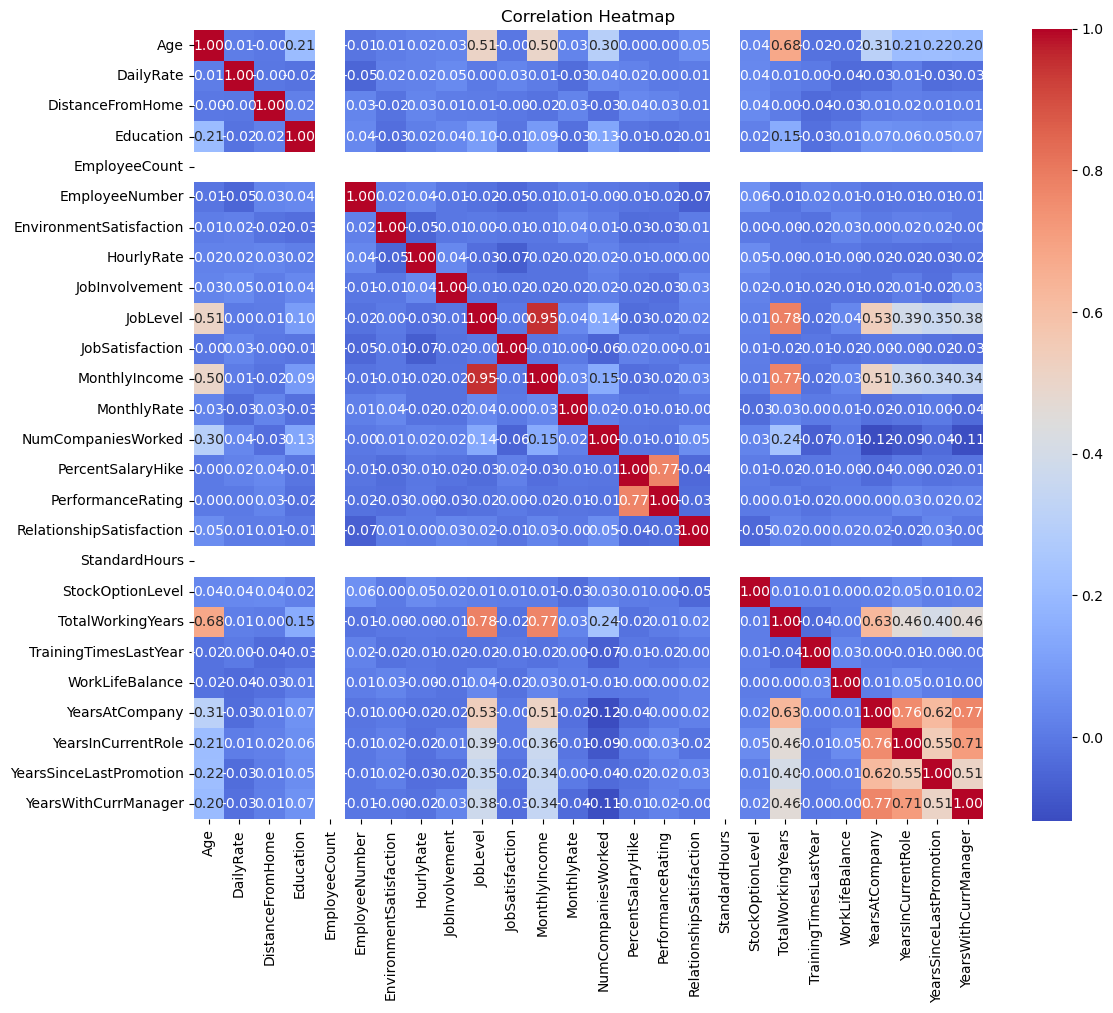

In [35]:
plt.figure(figsize=(12, 10))
sns.heatmap(pdf.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### 퇴사율에 영향력이 높아 보이는 변수 Top 10 (시각화 기반)

#### 수치형 변수 (Numerical Features)

1. **MonthlyIncome**  
   - 퇴사자 그룹에서 상대적으로 낮은 수입을 보임  
   - 급여가 낮을수록 퇴사 가능성이 높음

2. **YearsSinceLastPromotion**  
   - 승진을 오랫동안 받지 못한 직원일수록 퇴사율이 높음

3. **YearsWithCurrManager**  
   - 현 매니저와의 관계가 오래되지 않은 사람일수록 퇴사율 높음

4. **YearsInCurrentRole**  
   - 역할에 오래 있었던 직원은 퇴사율 낮음  
   - 역할 안정성이 영향을 줄 수 있음

5. **PercentSalaryHike**  
   - 급여 인상률이 낮은 사람들에게 퇴사 경향이 있음

#### 범주형 변수 (Categorical Features)

6. **OverTime**  
   - 초과근무(Yes) 직원의 퇴사율이 월등히 높음

7. **JobRole**  
   - 특정 직무(예: Sales Representative)에서 퇴사율이 높은 경향

8. **WorkLifeBalance**  
   - 낮은 워라밸 점수를 받은 직원들이 퇴사율이 높음

9. **JobSatisfaction**  
   - 직무 만족도가 낮은 직원일수록 퇴사 경향

10. **EnvironmentSatisfaction**  
    - 근무 환경 만족도가 낮은 직원에서 퇴사율이 높음


In [9]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline


In [10]:
# encoding
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

In [23]:
# 타겟()encoding 0/1 no/yes
label_indexer = StringIndexer(inputCol="Attrition", outputCol="label")

### 로지스틱 회귀 

In [12]:
# 컬럼 정리
# 범주형 변수: 문자형 (One-Hot Encoding)
categorical_cols = [
    "BusinessTravel", "Department", "EducationField", "Gender",
    "JobRole", "MaritalStatus", "OverTime"
]

# 수치형 변수
numeric_cols = [
    "Age", "DistanceFromHome", "Education", "EnvironmentSatisfaction",
    "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction",
    "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
    "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
    "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]

# 제거할 컬럼
drop_cols = ["EmployeeNumber", "Over18", "EmployeeCount", "StandardHours"]


In [13]:
# 불필요한 컬럼 제거 
hr_df_cleaned = df.drop(*drop_cols)

In [45]:
# 2. stages 리스트 선언
stages = []

# 3. 범주형 변수: StringIndexer → OneHotEncoder
for col_name in categorical_cols:
    indexer = StringIndexer(inputCol=col_name, outputCol=col_name + "_idx", handleInvalid='keep')
    encoder = OneHotEncoder(inputCols=[col_name + "_idx"], outputCols=[col_name + "_ohe"])
    stages += [indexer, encoder]

# 4. 타겟 변수 인코딩
label_indexer = StringIndexer(inputCol="Attrition", outputCol="label")
stages.append(label_indexer)

# 5. 피처 조합 (OneHot + Numeric)
assembler_inputs = [col + "_ohe" for col in categorical_cols] + numeric_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
stages.append(assembler)

# 6. 모델 정의
lr = LogisticRegression(featuresCol="features", labelCol="label")
stages.append(lr)

# 7. 파이프라인 구성
pipeline = Pipeline(stages=stages)

# 8. 학습-테스트 분리
train_df, test_df = hr_df_cleaned.randomSplit([0.8, 0.2], seed=42)

# 9. 학습
model = pipeline.fit(train_df)

# 10. 예측
predictions = model.transform(test_df)

# 11. 결과 확인
predictions.select("label", "prediction", "probability").show(5, truncate=False)

+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0.0  |0.0       |[0.8361443688302025,0.1638556311697975] |
|1.0  |1.0       |[0.05142476492955744,0.9485752350704426]|
|0.0  |0.0       |[0.6283051495693176,0.3716948504306824] |
|1.0  |0.0       |[0.8275015202710022,0.1724984797289978] |
|0.0  |1.0       |[0.3496549063704602,0.6503450936295398] |
+-----+----------+----------------------------------------+
only showing top 5 rows



In [15]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# === 평가자 설정 ===
evaluator_auc = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")

# === 결과 출력 ===
print("=== 모델 평가 결과 ===")
print(f"AUC: {evaluator_auc.evaluate(predictions):.4f}")
print(f"F1 Score: {evaluator_f1.evaluate(predictions):.4f}")
print(f"Precision: {evaluator_precision.evaluate(predictions):.4f}")
print(f"Recall: {evaluator_recall.evaluate(predictions):.4f}")


=== 모델 평가 결과 ===
AUC: 0.8046
F1 Score: 0.8657
Precision: 0.8766
Recall: 0.8819


### Using Random Forest 

In [16]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100)
pipeline = Pipeline(stages=indexers + encoders + [label_indexer, assembler, rf])

model = pipeline.fit(train_df)
predictions = model.transform(test_df)

predictions.select("label", "prediction", "probability").show(5, truncate=False)


+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0.0  |0.0       |[0.5531430103887729,0.44685698961122716]|
|1.0  |1.0       |[0.22563799196227657,0.7743620080377235]|
|0.0  |1.0       |[0.42761805722535706,0.5723819427746429]|
|1.0  |0.0       |[0.6091013643636264,0.3908986356363736] |
|0.0  |0.0       |[0.7714931876839919,0.22850681231600814]|
+-----+----------+----------------------------------------+
only showing top 5 rows



In [17]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc:.4f}")


AUC: 0.8004


In [18]:
# Feature Importance 출력
rf_model = model.stages[-1]  # 파이프라인의 마지막 stage가 RandomForestClassifier
importances = rf_model.featureImportances

# Feature 이름 추출
feature_names = assembler.getInputCols()

# 중요도 매핑
feature_importance_list = list(zip(feature_names, importances.toArray()))
sorted_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
print("\nFeature Importances:")
for feature, importance in sorted_importance:
    print(f"{feature:30} → {importance:.4f}")


Feature Importances:
YearsInCurrentRole             → 0.0898
YearsSinceLastPromotion        → 0.0747
YearsWithCurrManager           → 0.0737
WorkLifeBalance                → 0.0185
Department_ohe                 → 0.0172
RelationshipSatisfaction       → 0.0125
Gender_ohe                     → 0.0118
Education                      → 0.0084
MonthlyRate                    → 0.0077
JobRole_ohe                    → 0.0069
DistanceFromHome               → 0.0064
JobInvolvement                 → 0.0060
JobSatisfaction                → 0.0059
MonthlyIncome                  → 0.0052
TrainingTimesLastYear          → 0.0050
BusinessTravel_ohe             → 0.0047
Age                            → 0.0043
HourlyRate                     → 0.0042
JobLevel                       → 0.0037
TotalWorkingYears              → 0.0035
EducationField_ohe             → 0.0034
YearsAtCompany                 → 0.0034
OverTime_ohe                   → 0.0024
MaritalStatus_ohe              → 0.0022
NumCompaniesWorked

###  Improved logistic regression
중요도 매핑을 사용해 컬럼 선택 -> 새로운 모델 생성


In [24]:
from pyspark.sql.functions import when, col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
# 2. Top 10 feature만 사용
top_features = [
    "YearsSinceLastPromotion",
    "YearsInCurrentRole",
    "YearsWithCurrManager",
    "WorkLifeBalance",
    "Department",
    "RelationshipSatisfaction",
    "JobRole",
    "Gender",
    "YearsAtCompany",
    "Education"
]

# 3. 인코딩 대상 구분
cat_features = ["Department", "JobRole", "Gender"]
num_features = list(set(top_features) - set(cat_features))

# 4. 인코더 구성
indexers = [StringIndexer(inputCol=col, outputCol=col+"_idx").setHandleInvalid("keep") for col in cat_features]
encoders = [OneHotEncoder(inputCols=[col+"_idx"], outputCols=[col+"_ohe"]) for col in cat_features]

# 5. 전체 피쳐 모으기
final_features = [col+"_ohe" for col in cat_features] + num_features
assembler = VectorAssembler(inputCols=final_features, outputCol="features")

# 6. 모델
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100)

# 7. 파이프라인
pipeline = Pipeline(stages=indexers + encoders + [label_indexer, assembler, rf])

# 8. 학습 및 예측
model = pipeline.fit(train_df)
predictions = model.transform(test_df)

# 9. AUC 평가
evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"AUC (Top 10 Features Only): {auc:.4f}")

# 10. Feature Importance 출력
rf_model = model.stages[-1]
importances = rf_model.featureImportances
feature_names = assembler.getInputCols()
feature_importance_list = list(zip(feature_names, importances.toArray()))
sorted_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

print("\nFeature Importances:")
for feature, importance in sorted_importance:
    print(f"{feature:30} → {importance:.4f}")
    

AUC (Top 10 Features Only): 0.6711

Feature Importances:
YearsWithCurrManager           → 0.0907
YearsSinceLastPromotion        → 0.0381
Department_ohe                 → 0.0235
Education                      → 0.0191
JobRole_ohe                    → 0.0169
WorkLifeBalance                → 0.0147
RelationshipSatisfaction       → 0.0135
Gender_ohe                     → 0.0129
YearsAtCompany                 → 0.0122
YearsInCurrentRole             → 0.0085
